In [3]:
%matplotlib inline
import pandas as pd

In [4]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [5]:
dtitles = pd.DataFrame.from_csv('data/test.csv', index_col=None)
dtitles.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [6]:
dprices = pd.DataFrame.from_csv('data/sample_submission.csv', index_col=None)
dprices.head()

,Id,SalePrice
0,1461,169277.0525
1,1462,187758.3940
2,1463,183583.6836
3,1464,179317.4775
4,1465,150730.0800


In [7]:
# Merge/combine the properties' descriptions and its sales prices into a new dataframe.
h_data = pd.merge(dtitles, dprices, on='Id')
h_data.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.0525
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.3940
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.6836
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.4775


In [8]:
# NUMBER OF HOUSES SOLD EACH MONTH FOR THE YEAR 2006, 2007, 2008, 2009, 2010

In [9]:
# 2006
h_data1 = h_data[h_data.YrSold == 2006].groupby('MoSold').size()

h_d2006 = h_data1.to_frame()
#print(h_d2006)


# 2007
h_data1 = h_data[h_data.YrSold == 2007].groupby('MoSold').size()

h_d2007 = h_data1.to_frame()
#print(h_d2007)


# 2008
h_data1 = h_data[h_data.YrSold == 2008].groupby('MoSold').size()

h_d2008 = h_data1.to_frame()
#print(h_d2008)


# 2009
h_data1 = h_data[h_data.YrSold == 2009].groupby('MoSold').size()

h_d2009 = h_data1.to_frame()
#print(h_d2009)


# 2010
h_data1 = h_data[h_data.YrSold == 2010].groupby('MoSold').size()

h_d2010 = h_data1.to_frame()
#print(h_d2010)


all_hd = pd.concat([h_d2006, h_d2007, h_d2008, h_d2009, h_d2010], axis=1)
col = ['2006', '2007', '2008', '2009', '2010']
all_hd.columns = col
all_hd

,2006,2007,2008,2009,2010
MoSold,,,,,
1,8,18,16,7,15.0
2,15,20,18,17,11.0
3,26,30,17,26,27.0
4,21,27,35,22,33.0
5,36,46,45,32,31.0
6,48,47,57,53,45.0
7,53,56,52,49,2.0
8,22,35,22,32,NaN
9,25,28,18,24,NaN


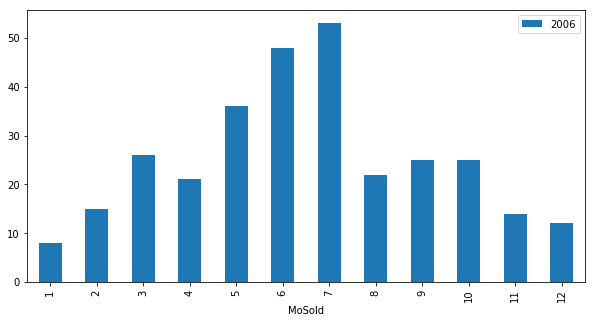

In [10]:
#2006
all_hd.plot(kind='bar', y=['2006'], figsize=(10,5))

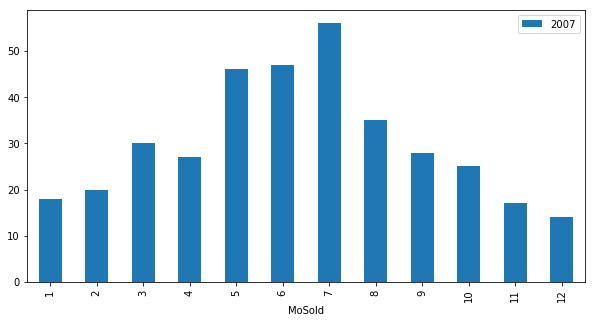

In [11]:
#2007
all_hd.plot(kind='bar', y=['2007'], figsize=(10,5))

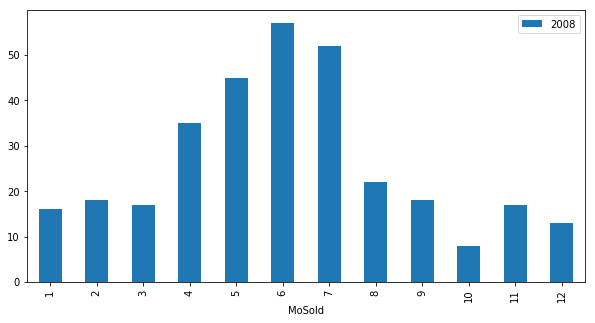

In [12]:
#2008
all_hd.plot(kind='bar', y=['2008'], figsize=(10,5))

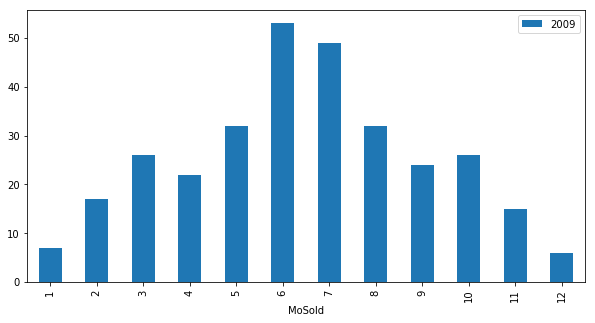

In [13]:
#2009
all_hd.plot(kind='bar', y=['2009'], figsize=(10,5))

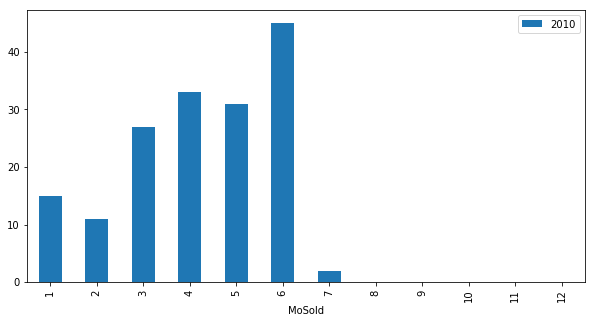

In [14]:
#2010
all_hd.plot(kind='bar', y=['2010'], figsize=(10,5))

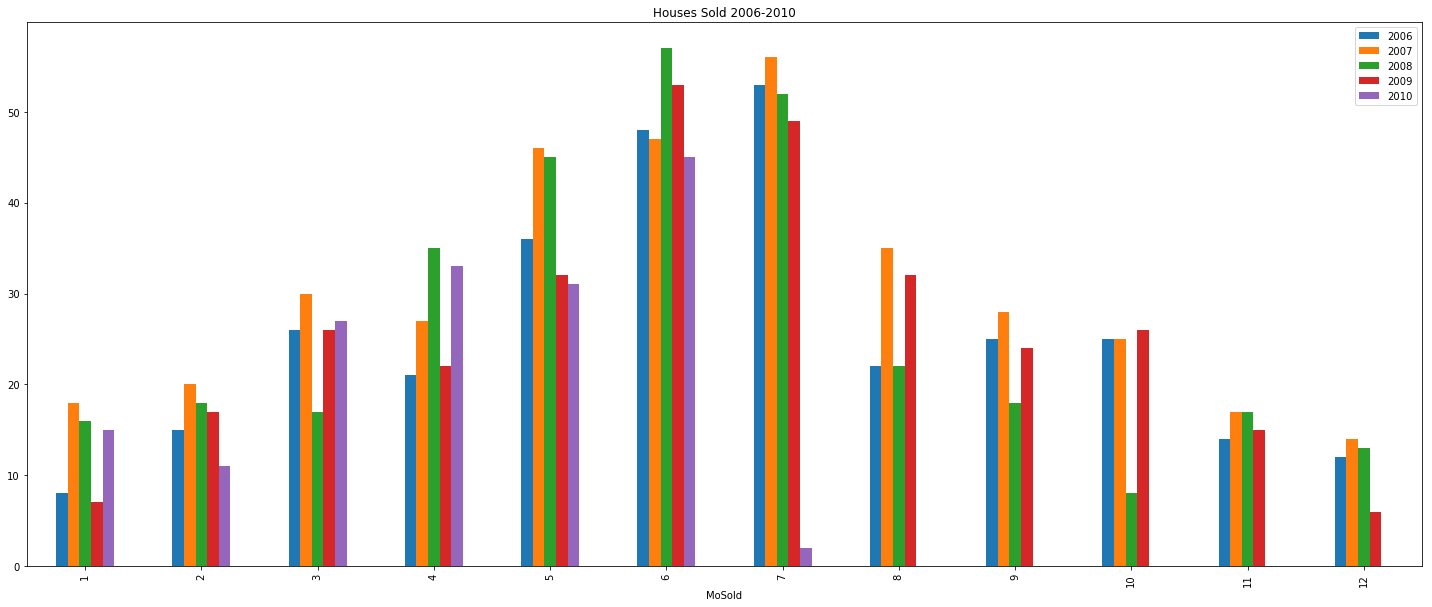

In [15]:
# 2006-2010
all_hd.plot(kind='bar', figsize=(25,10),title='Houses Sold 2006-2010')

In [16]:
# WHAT WAS THE AVERAGE PRICE OF HOMES SOLD ON EACH MONTH OF THE YEAR?

In [17]:
h_dprices = h_data[h_data.YrSold == 2006]
h_dprices1 = h_dprices.groupby('MoSold').SalePrice.mean()
h_dprices2006 = h_dprices1.to_frame()
h_dprices2006.columns = ['Avg_Mo_Prices']
h_dprices2006

h_dprices = h_data[h_data.YrSold == 2007]
h_dprices1 = h_dprices.groupby('MoSold').SalePrice.mean()
h_dprices2007 = h_dprices1.to_frame()
h_dprices2007.columns = ['Avg_Mo_Prices']
h_dprices2007

h_dprices = h_data[h_data.YrSold == 2008]
h_dprices1 = h_dprices.groupby('MoSold').SalePrice.mean()
h_dprices2008 = h_dprices1.to_frame()
h_dprices2008.columns = ['Avg_Mo_Prices']
h_dprices2008

h_dprices = h_data[h_data.YrSold == 2009]
h_dprices1 = h_dprices.groupby('MoSold').SalePrice.mean()
h_dprices2009 = h_dprices1.to_frame()
h_dprices2009.columns = ['Avg_Mo_Prices']
h_dprices2009

h_dprices = h_data[h_data.YrSold == 2010]
h_dprices1 = h_dprices.groupby('MoSold').SalePrice.mean()
h_dprices2010 = h_dprices1.to_frame()
h_dprices2010.columns = ['Avg_Mo_Prices']
h_dprices2010

all_hprices = pd.concat([h_dprices2006, h_dprices2007, h_dprices2008, h_dprices2009, h_dprices2010], axis=1)
col = ['Avg_Mo_Price_2006', 'Avg_Mo_Price_2007', 'Avg_Mo_Price_2008', 'Avg_Mo_Price_2009', 'Avg_Mo_Price_2010']
all_hprices.columns = col
all_hprices

,Avg_Mo_Price_2006,Avg_Mo_Price_2007,Avg_Mo_Price_2008,Avg_Mo_Price_2009,Avg_Mo_Price_2010
MoSold,,,,,
1,181021.149475,176700.864911,185218.039975,176522.654271,172620.427627
2,174718.217400,175566.737665,166942.678006,166911.548547,171292.593891
3,177407.304885,177086.436523,170410.895453,171425.947969,174539.743400
4,170331.671500,177703.962811,174074.776840,175397.744250,168757.239558
5,180468.867539,178661.606070,177437.168544,178793.145916,172139.810090
6,177370.909327,183482.205147,179081.411447,180936.560938,177335.599242
7,182576.233808,179908.027684,179249.329723,178931.514157,181997.784750
8,187578.866895,178163.113511,179096.504845,180642.111172,NaN
9,192110.858064,180215.019993,181064.790822,179918.851996,NaN


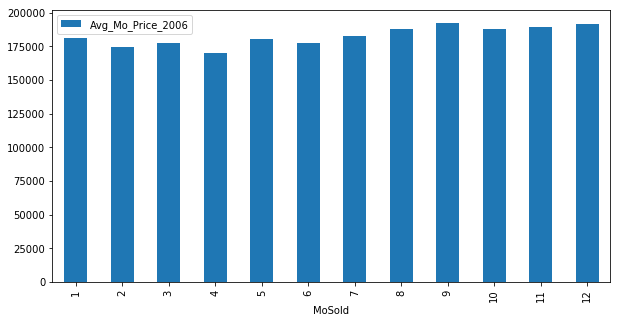

In [18]:
# 2006
all_hprices.plot(kind='bar', y=['Avg_Mo_Price_2006'], figsize=(10,5))

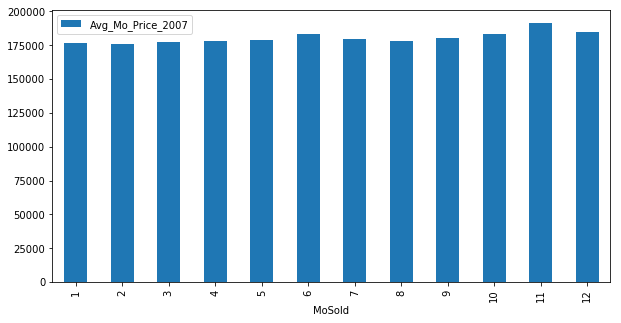

In [19]:
# 2007
all_hprices.plot(kind='bar', y=['Avg_Mo_Price_2007'], figsize=(10,5))

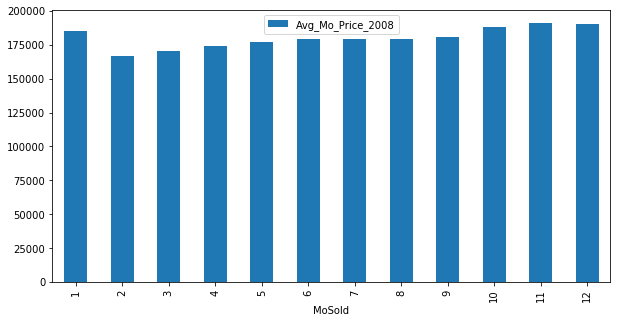

In [20]:
# 2008
all_hprices.plot(kind='bar', y=['Avg_Mo_Price_2008'], figsize=(10,5))

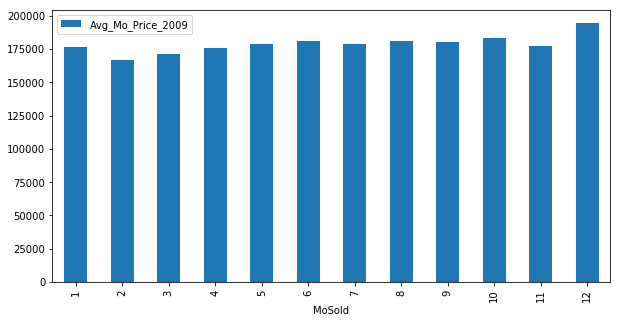

In [21]:
# 2009
all_hprices.plot(kind='bar', y=['Avg_Mo_Price_2009'], figsize=(10,5))

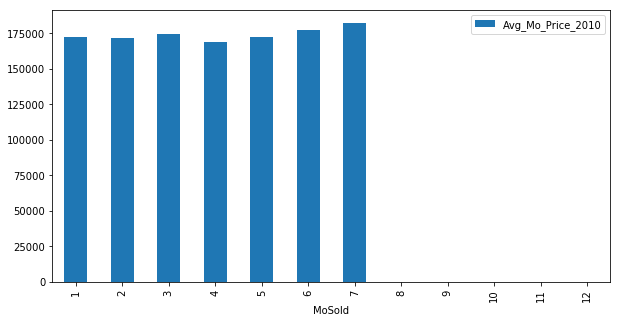

In [22]:
# 2010
all_hprices.plot(kind='bar', y=['Avg_Mo_Price_2010'], figsize=(10,5))

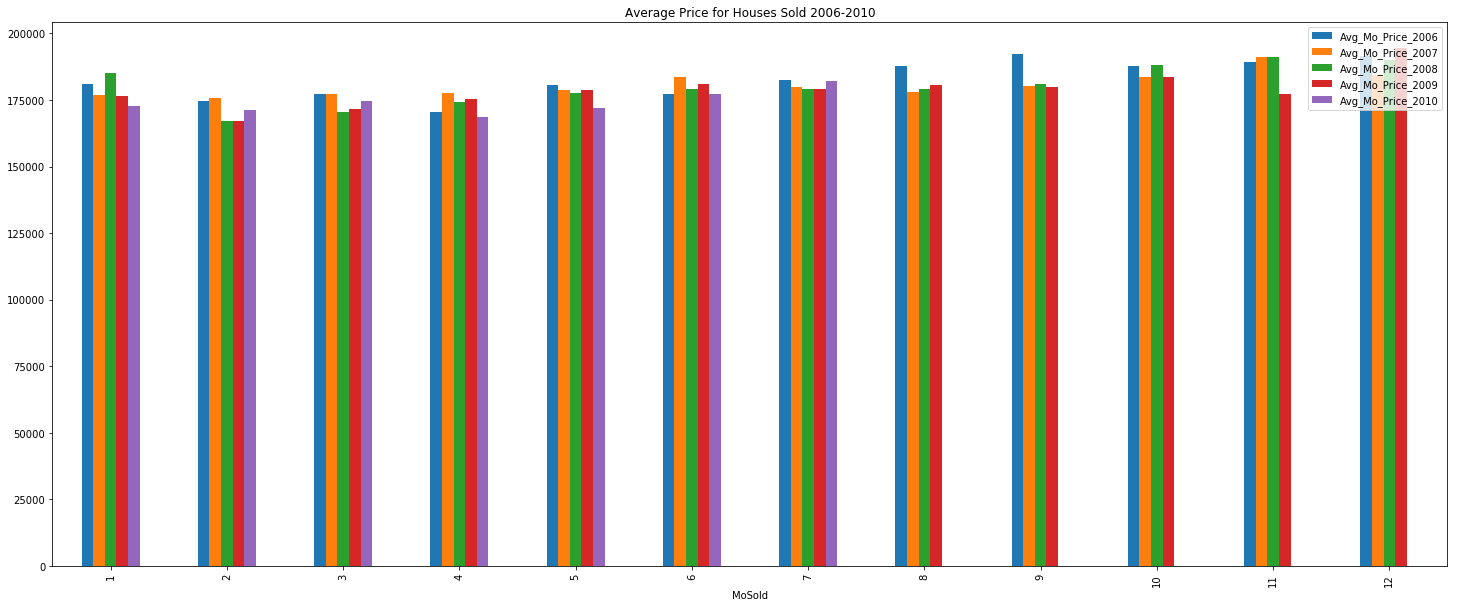

In [23]:
# 2006-2010
all_hprices.plot(kind='bar', figsize=(25,10),title='Average Price for Houses Sold 2006-2010')

In [24]:
# Average number of bedrooms and bathrooms in the homes? What is the average prices for these houses?

In [25]:
h_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.0525
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.3940
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.6836
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.4775
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.0800
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,177150.9892
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal,172070.6592
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,175110.9565
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,162011.6988
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal,160726.2478


In [67]:
# Number of bedrooms and bathrooms in 2006
h_drooms = h_data[h_data.YrSold == 2006]
h_dbrooms2006 = h_drooms.groupby('MoSold').BedroomAbvGr.mean()
h_dbrooms2006

h_dbrooms2006= h_dbrooms2006.to_frame()
h_dbrooms2006.columns = ['Avg_Num_Bd_2006']
h_dbrooms2006

h_dfbaths2006 = h_drooms.groupby('MoSold').FullBath.mean()
h_dfbaths2006

h_dfbaths2006= h_dfbaths2006.to_frame()
h_dfbaths2006.columns = ['Avg_Num_FBath_2006']
h_dfbaths2006


br_and_bth2006 = pd.concat([h_dbrooms2006,h_dfbaths2006], axis=1)
br_and_bth2006

,Avg_Num_Bd_2006,Avg_Num_FBath_2006
MoSold,,
1,3.000000,1.625000
2,2.800000,1.600000
3,2.730769,1.423077
4,2.523810,1.476190
5,2.972222,1.527778
6,2.666667,1.395833
7,2.981132,1.528302
8,3.090909,1.727273
9,3.120000,1.720000


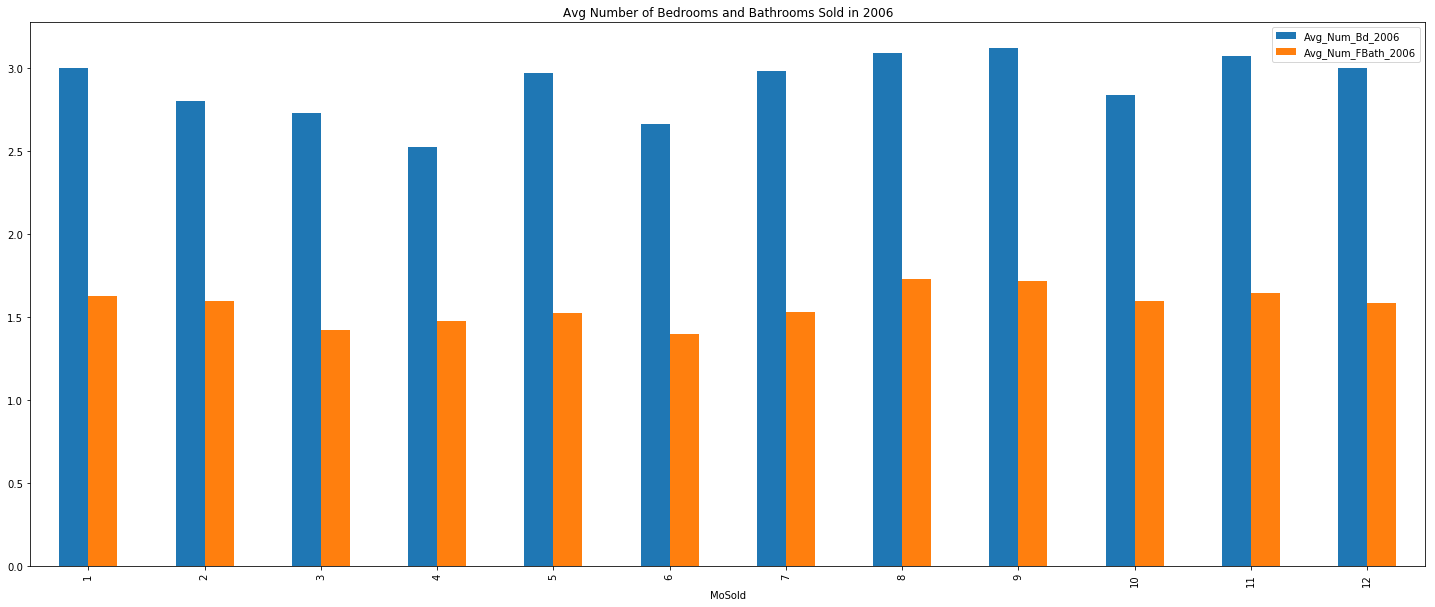

In [56]:
# 2006
br_and_bth2006.plot(kind='bar', figsize=(25,10),title='Avg Number of Bedrooms and Bathrooms Sold in 2006')

In [57]:
# Number of bedrooms and bathrooms in 2007
h_drooms = h_data[h_data.YrSold == 2007]
h_dbrooms2007 = h_drooms.groupby('MoSold').BedroomAbvGr.mean()
h_dbrooms2007

h_dbrooms2007= h_dbrooms2007.to_frame()
h_dbrooms2007.columns = ['Avg_Num_Bd_2007']
h_dbrooms2007

h_dfbaths2007 = h_drooms.groupby('MoSold').FullBath.mean()
h_dfbaths2007

h_dfbaths2007= h_dfbaths2007.to_frame()
h_dfbaths2007.columns = ['Avg_Num_FBath_2007']
h_dfbaths2007


br_and_bth2007 = pd.concat([h_dbrooms2007,h_dfbaths2007], axis=1)
br_and_bth2007

,Avg_Num_Bd_2007,Avg_Num_FBath_2007
MoSold,,
1,2.833333,1.500000
2,2.950000,1.550000
3,2.866667,1.600000
4,2.851852,1.518519
5,2.782609,1.565217
6,2.872340,1.574468
7,2.857143,1.535714
8,2.571429,1.571429
9,2.750000,1.714286


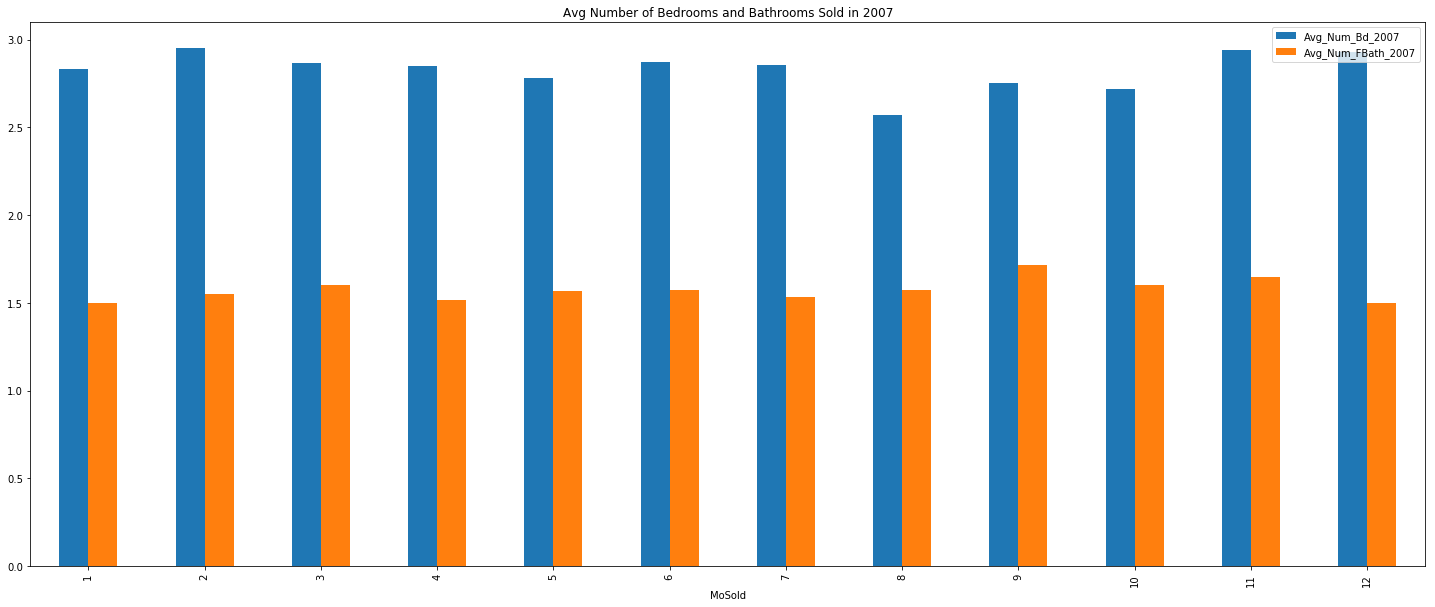

In [58]:
# 2007
br_and_bth2007.plot(kind='bar', figsize=(25,10),title='Avg Number of Bedrooms and Bathrooms Sold in 2007')

In [59]:
# Number of bedrooms and bathrooms in 2008
h_drooms = h_data[h_data.YrSold == 2008]
h_dbrooms2008 = h_drooms.groupby('MoSold').BedroomAbvGr.mean()
h_dbrooms2008

h_dbrooms2008= h_dbrooms2008.to_frame()
h_dbrooms2008.columns = ['Avg_Num_Bd_2008']
h_dbrooms2008

h_dfbaths2008 = h_drooms.groupby('MoSold').FullBath.mean()
h_dfbaths2008

h_dfbaths2008= h_dfbaths2008.to_frame()
h_dfbaths2008.columns = ['Avg_Num_FBath_2008']
h_dfbaths2008


br_and_bth2008 = pd.concat([h_dbrooms2008,h_dfbaths2008], axis=1)
br_and_bth2008

,Avg_Num_Bd_2008,Avg_Num_FBath_2008
MoSold,,
1,3.125000,1.562500
2,2.444444,1.444444
3,2.647059,1.588235
4,2.771429,1.571429
5,2.888889,1.466667
6,2.912281,1.596491
7,2.750000,1.615385
8,2.681818,1.590909
9,2.777778,1.611111


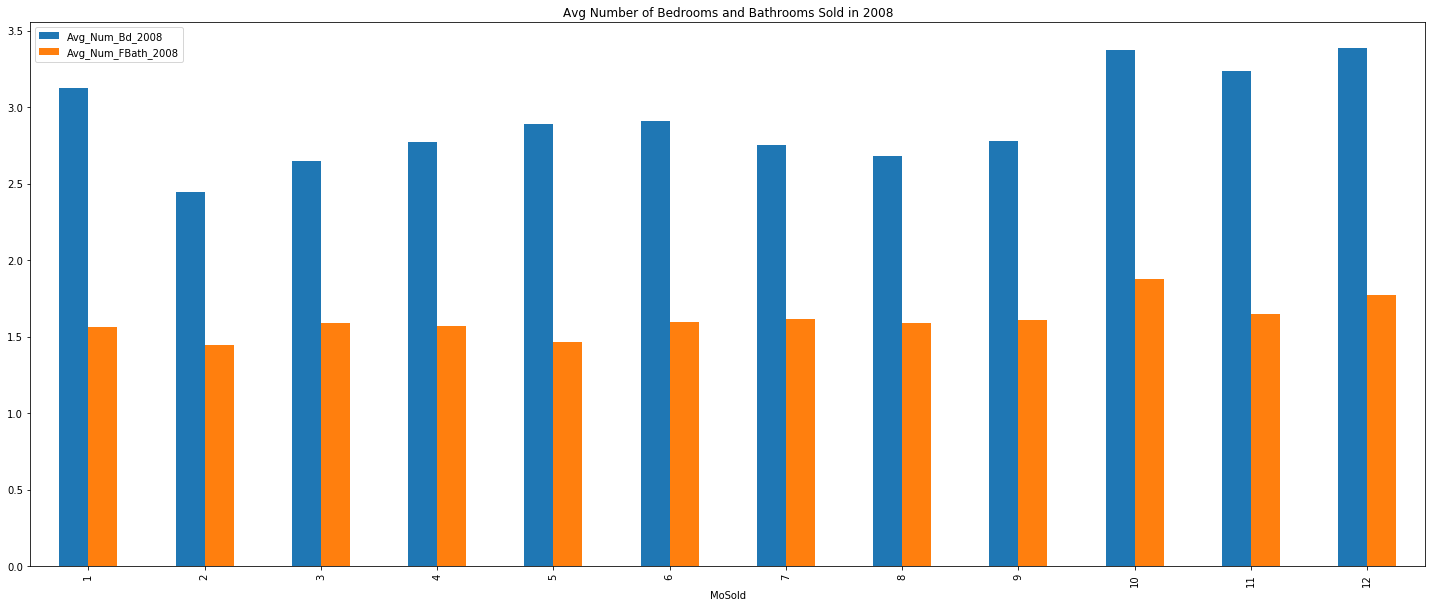

In [60]:
# 2008
br_and_bth2008.plot(kind='bar', figsize=(25,10),title='Avg Number of Bedrooms and Bathrooms Sold in 2008')

In [63]:
# Number of bedrooms and bathrooms in 2009
h_drooms = h_data[h_data.YrSold == 2009]
h_dbrooms2009 = h_drooms.groupby('MoSold').BedroomAbvGr.mean()
h_dbrooms2009

h_dbrooms2009= h_dbrooms2009.to_frame()
h_dbrooms2009.columns = ['Avg_Num_Bd_2009']
h_dbrooms2009

h_dfbaths2009 = h_drooms.groupby('MoSold').FullBath.mean()
h_dfbaths2009

h_dfbaths2009= h_dfbaths2009.to_frame()
h_dfbaths2009.columns = ['Avg_Num_FBath_2009']
h_dfbaths2009


br_and_bth2009 = pd.concat([h_dbrooms2009,h_dfbaths2009], axis=1)
br_and_bth2009

,Avg_Num_Bd_2009,Avg_Num_FBath_2009
MoSold,,
1,3.000000,1.857143
2,2.470588,1.529412
3,2.653846,1.576923
4,2.772727,1.545455
5,3.031250,1.718750
6,3.018868,1.679245
7,2.795918,1.571429
8,3.062500,1.593750
9,2.916667,1.458333


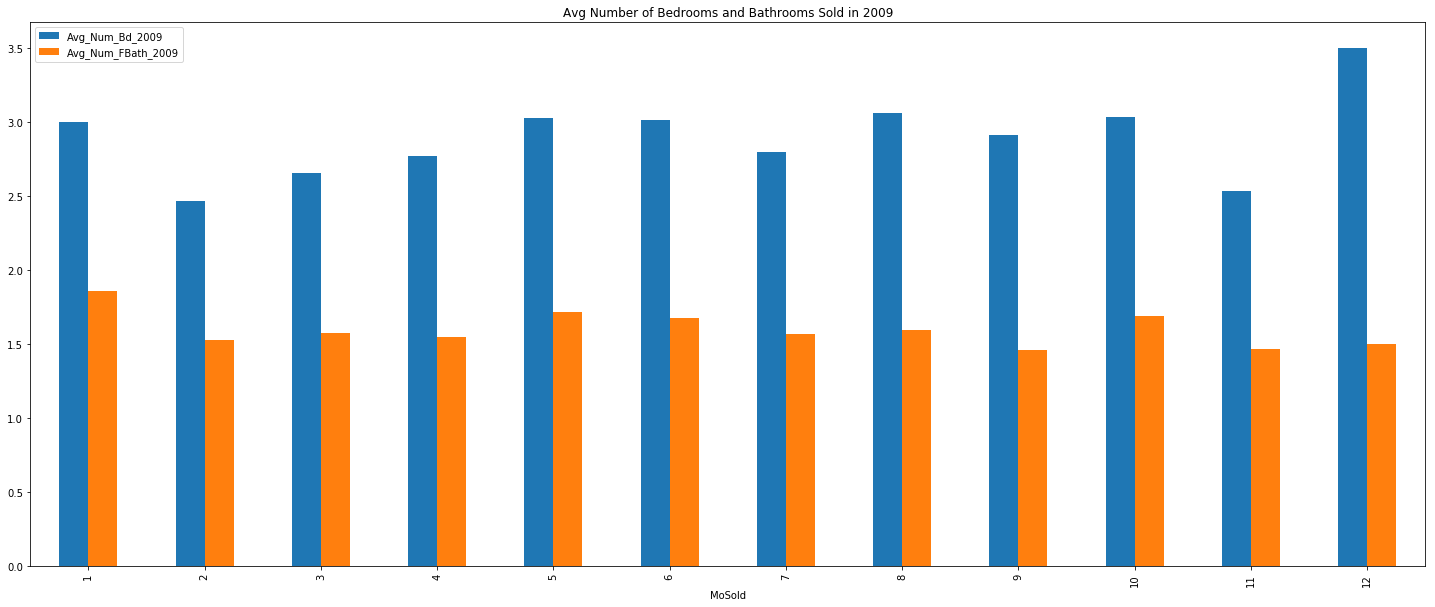

In [64]:
# 2009
br_and_bth2009.plot(kind='bar', figsize=(25,10),title='Avg Number of Bedrooms and Bathrooms Sold in 2009')

In [65]:
# Number of bedrooms and bathrooms in 2010
h_drooms = h_data[h_data.YrSold == 2010]
h_dbrooms2010 = h_drooms.groupby('MoSold').BedroomAbvGr.mean()
h_dbrooms2010

h_dbrooms2010= h_dbrooms2010.to_frame()
h_dbrooms2010.columns = ['Avg_Num_Bd_2010']
h_dbrooms2010

h_dfbaths2010 = h_drooms.groupby('MoSold').FullBath.mean()
h_dfbaths2010

h_dfbaths2010= h_dfbaths2010.to_frame()
h_dfbaths2010.columns = ['Avg_Num_FBath_2010']
h_dfbaths2010


br_and_bth2010 = pd.concat([h_dbrooms2010,h_dfbaths2010], axis=1)
br_and_bth2010

,Avg_Num_Bd_2010,Avg_Num_FBath_2010
MoSold,,
1,2.800000,1.600000
2,3.090909,1.818182
3,3.148148,1.555556
4,2.424242,1.575758
5,2.709677,1.548387
6,2.866667,1.377778
7,3.000000,1.000000


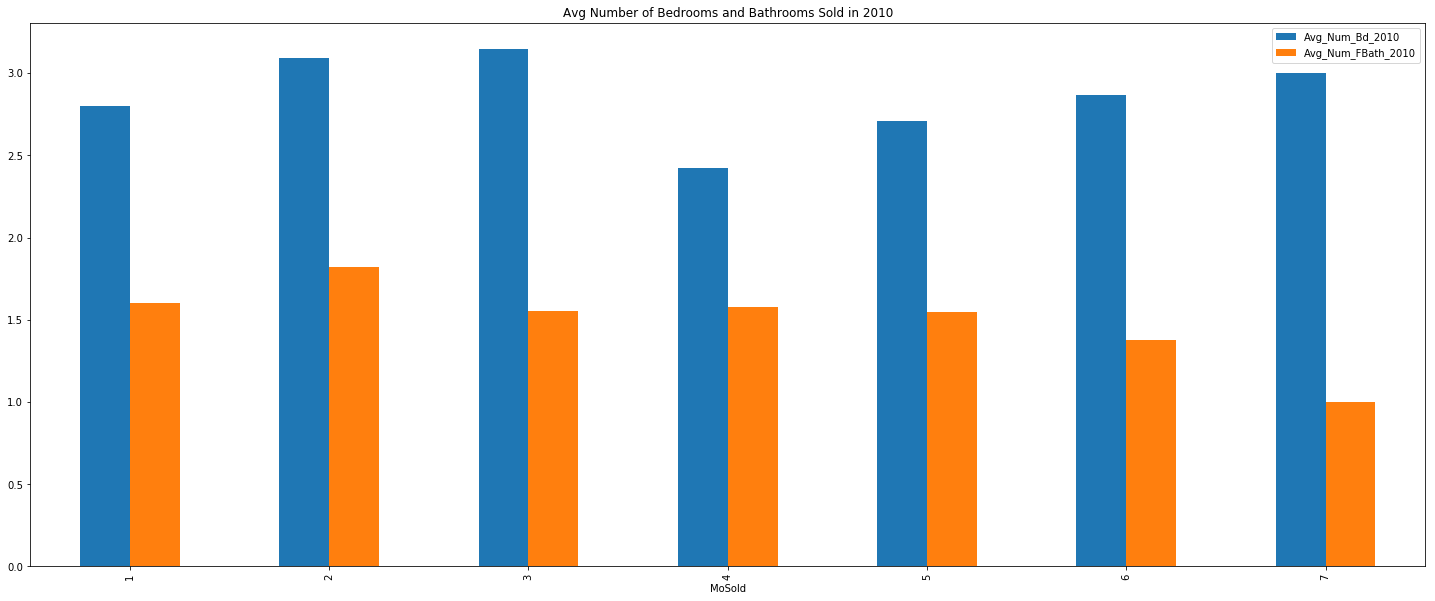

In [66]:
# 2010
br_and_bth2010.plot(kind='bar', figsize=(25,10),title='Avg Number of Bedrooms and Bathrooms Sold in 2010')